# From Intermolecular Interactions to Dynamics at the Atomistic Scale

## System Setup

In [41]:
import matplotlib.pyplot as plt 
from matplotlib import cm
import numpy as np

## Initial conditions
# positions
x0=np.array([1, 2, 3, 3, 3, 2, 1, 1]);       
y0=np.array([1, 1, 1, 2, 3, 3, 3, 2]);

# timestep
dt=0.05;

#mass of the particles
m=np.array([1,1,1,1,1,1,1,1]);

#number of iterations
final_time=10;
NS=final_time/dt; 
nsteps=np.round(NS); 

#Interatomic potential constants
k=20.0; # Harmonic oscillator constant
req=1; # Harmonic oscillator equilibrium distance
HS=10; # 

# Topology
M=np.array([[0, 1, 0, 0, 0, 0, 0, 1],
           [1, 0, 1, 0, 0, 0, 0, 0],
           [0, 1, 0, 1, 0, 0, 0, 0],
           [0, 0, 1, 0, 1, 0, 0, 0],
           [0, 0, 0, 1, 0, 1, 0, 0],
           [0, 0, 0, 0, 1, 0, 1, 0],
           [0, 0, 0, 0, 0, 1, 0, 1],
           [1, 0, 0, 0, 0, 0, 1, 0]])
k=k*M;

# velocities
v0=0.5*(np.random.rand(2,8)-0.5);

## Integration and Visualization

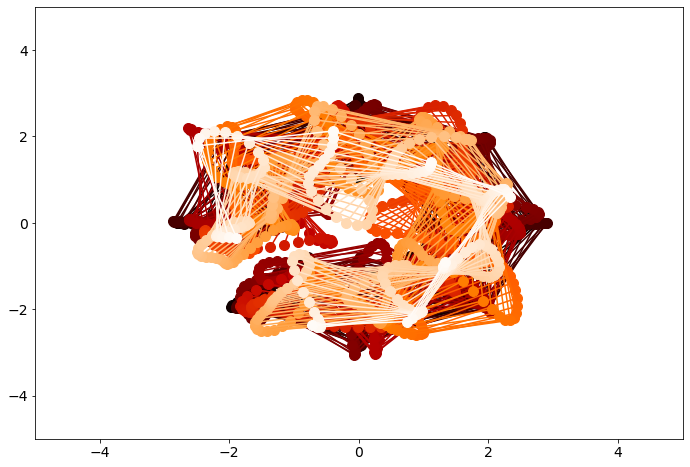

In [44]:
from matplotlib.animation import FuncAnimation

# Setup figure for plotting the trajectory
figure=plt.figure();
axes = figure.add_axes([0.1,0.1,1.5,1.5])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.set_xlim([-5,5]);
axes.set_ylim([-5,5]);


## Compute a trajectory with the Verlet Algorithm

# Initialise
xp=x0;
yp=y0;
xnew=np.zeros(np.shape(x0));
ynew=np.zeros(np.shape(x0));
# Position at time t
x=xp+v0[0,:]*dt;
y=yp+v0[1,:]*dt;

time=np.arange(0,nsteps);
color=iter(cm.gist_heat(np.linspace(0,1,np.size(time)+1)))
xx=np.zeros((np.size(time),8));
yy=np.zeros((np.size(time),8));

time[0]=0;
time[1]=time[0]+dt;

# Initialise Energy
POT=np.zeros(np.shape(time));
KIN=np.zeros(np.shape(time));

for timestep in np.arange(1,nsteps):
    c=next(color)
    timestep=int(timestep)
    
    # Initialise force vectors
    fx=np.zeros(np.size(x0));  
    fy=np.zeros(np.size(x0)); 
    
    # COMPUTE DISTANCES and the intermolecular forces
    for i in np.arange(0,np.size(x0)):
        for j in np.arange(i+1,np.size(x0)):
            
            r=np.sqrt((x[i]-x[j])*(x[i]-x[j])+(y[i]-y[j])*(y[i]-y[j]));     
               
            cx=-(k[i,j]*(r-req)-2*HS/(np.power(r,3)))*((x[i]-x[j]))/r;
            cy=-(k[i,j]*(r-req)-2*HS/(np.power(r,3)))*((y[i]-y[j]))/r;  
                
            fx[i]=fx[i]+cx;      
            fx[j]=fx[j]-cx;
            
            fy[i]=fy[i]+cy;
            fy[j]=fy[j]-cy;
           
       
    #Verlet integration
    for i in np.arange(0,np.size(x0)):
        r=np.sqrt(np.power(x[i],2)+np.power(y[i],2));
        xnew[i]=2*x[i]-xp[i]+(dt*dt)*fx[i]/m[i];
        ynew[i]=2*y[i]-yp[i]+(dt*dt)*fy[i]/m[i];
    
    # Compute velocity     
    vx=(xnew-xp)/2/dt;
    vy=(ynew-yp)/2/dt;
    
    v=np.sqrt(np.power(vx,2)+np.power(vy,2)); 
    xp=x; yp=y; x=xnew-np.mean(xnew); y=ynew-np.mean(ynew);
    line, = axes.plot(x,y,marker='o',color=c,markersize=10,linestyle='-')
    plt.show